In [2]:
first_number = 45
second_number = 32

first_number + second_number #böyle de çalışır 
print(f'{first_number} + {second_number} = {first_number + second_number}')

45 + 32 = 77


In [4]:
import pandas as pd

df_animal = pd.read_csv('data/msleep.csv') #birden fazla satır varsa dataframe döner!
df_animal

,name,genus,vore,order,conservation,sleep_total,sleep_rem,sleep_cycle,awake,brainwt,bodywt
0,Cheetah,Acinonyx,carni,Carnivora,lc,12.1,NaN,NaN,11.9,NaN,50.000
1,Owl monkey,Aotus,omni,Primates,NaN,17.0,1.8,NaN,7.0,0.01550,0.480
2,Mountain beaver,Aplodontia,herbi,Rodentia,nt,14.4,2.4,NaN,9.6,NaN,1.350
3,Greater short-tailed shrew,Blarina,omni,Soricomorpha,lc,14.9,2.3,0.133333,9.1,0.00029,0.019
4,Cow,Bos,herbi,Artiodactyla,domesticated,4.0,0.7,0.666667,20.0,0.42300,600.000
...,...,...,...,...,...,...,...,...,...,...,...
78,Tree shrew,Tupaia,omni,Scandentia,NaN,8.9,2.6,0.233333,15.1,0.00250,0.104
79,Bottle-nosed dolphin,Tursiops,carni,Cetacea,NaN,5.2,NaN,NaN,18.8,NaN,173.330
80,Genet,Genetta,carni,Carnivora,NaN,6.3,1.3,NaN,17.7,0.01750,2.000
81,Arctic fox,Vulpes,carni,Carnivora,NaN,12.5,NaN,NaN,11.5,0.04450,3.380


In [30]:
#okuma işlemini göstermek gerekir
df_animal
##ilk 5 satırı gösterir. parantezin içine sayı verilerek değiştirilebilir bu sayı
df_animal.head()
#sondan ilk 5 satırı gösterir. parantezin içine sayı verilerek değiştirilebilir bu sayı
df_animal.tail()
# #dataframedeki columnların adını verir. propertydir
df_animal.columns
##her bir sütunun hangi tip olduğunu seri olarak veirir. seri tek satırdır, dataframe birden fazla satırdan olaşur. object -> string demektir
df_animal.dtypes
#dfnin kaç satır ve sütundan oluştuğunu. tupple ile döndürür, tupple değiştirilmez!
df_animal.shape
##boş kayıtlara sahip olup olmadığını verir, ramde ne kadar yer kapladığına vs, hangi türde veriler vs
df_animal.info()
##sayısal kısımlardaki özet istatistikleri verir. ort vs. transpoz kısmını kaçırdım
df_animal.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83 entries, 0 to 82
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          83 non-null     object 
 1   genus         83 non-null     object 
 2   vore          76 non-null     object 
 3   order         83 non-null     object 
 4   conservation  54 non-null     object 
 5   sleep_total   83 non-null     float64
 6   sleep_rem     61 non-null     float64
 7   sleep_cycle   32 non-null     float64
 8   awake         83 non-null     float64
 9   brainwt       56 non-null     float64
 10  bodywt        83 non-null     float64
dtypes: float64(6), object(5)
memory usage: 7.3+ KB


0      7
1     10
2     15
3     26
4      3
      ..
78    10
79    20
80     5
81    10
82     7
Name: name, Length: 83, dtype: int64

In [40]:
##name sütunundaki her bir elemanın isminin uzunluğunu döndürür
df_animal['name'].str.len()
##vore değeri herbi olanları verir. where gibi yani
df_animal[df_animal['vore'] == 'herbi']
#hangi beslenme türünden kaç tane. seri döndürür. groupby'a karşılık gelir!
df_animal['vore'].value_counts()
##bana voreları grupla, voreları sayarak ver. sum olabilir count olabilir avg olabilir. nan değerleri vermez
df_animal.groupby('vore')['vore'].size()
#vorelardan unique olarak hangi değerler varsa verir. nanları verir bu
df_animal['vore'].unique()

array(['carni', 'omni', 'herbi', nan, 'insecti'], dtype=object)

<Axes: xlabel='sleep_total', ylabel='Count'>

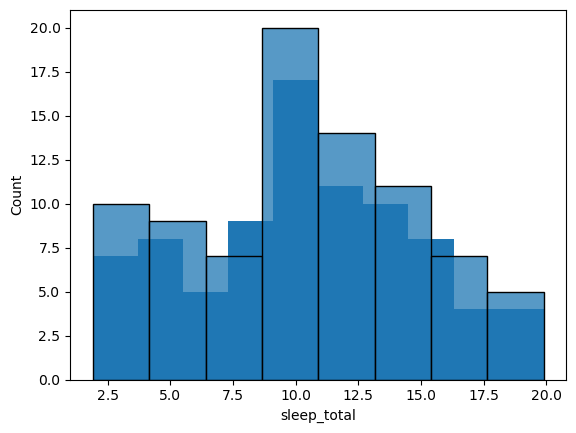

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.hist(df_animal['sleep_total'])
sns.histplot(df_animal['sleep_total'])

In [52]:
#ortlama
import numpy as np
np.mean(df_animal['sleep_total'])
df_animal['sleep_total'].mean()

10.433734939759034

In [66]:
#manuel :
toplam = df_animal['sleep_total'].sum()
toplam
sayi = len(list(df_animal['sleep_total']))
sayi
ort = toplam/sayi
ort

10.433734939759034

In [68]:
np.median(df_animal['sleep_total'])

10.1

In [70]:
#mod
import statistics as stat
stat.mode(df_animal.vore)

'herbi'

Text(0.5, 1.0, 'Uyku Dağılımı Grafiği')

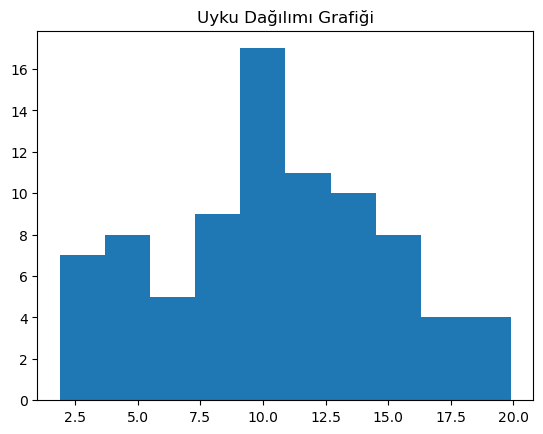

In [72]:
#sleep_totalin histogramını oluştur
plt.hist(df_animal.sleep_total)
plt.title('Uyku Dağılımı Grafiği')

In [74]:
df_animal.vore.value_counts(normalize=True)

vore
herbi      0.421053
omni       0.263158
carni      0.250000
insecti    0.065789
Name: proportion, dtype: float64

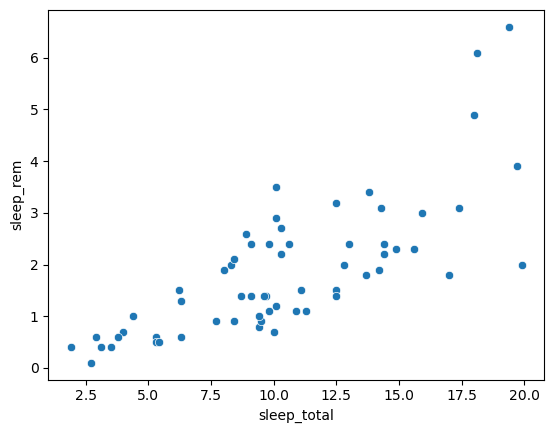

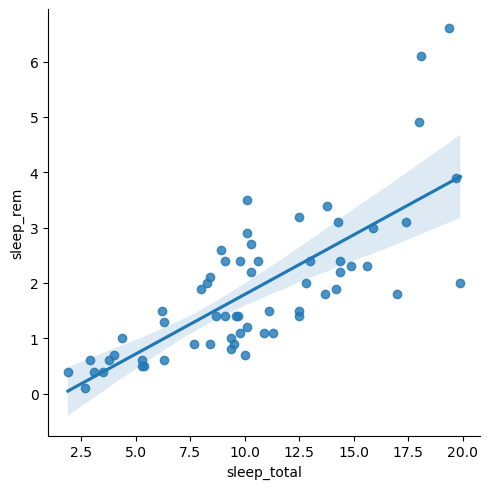

In [80]:
df_animal['sleep_total'].corr(df_animal['sleep_rem'])
sns.scatterplot(x='sleep_total', y='sleep_rem', data=df_animal)
sns.lmplot(x='sleep_total', y='sleep_rem', data=df_animal)

In [84]:
df_animal[df_animal['vore'] == 'insecti']['sleep_rem'].agg(['mean','median'])

mean      3.525
median    3.000
Name: sleep_rem, dtype: float64

In [86]:
range_sleep_total = df_animal['sleep_total'].max() - df_animal['sleep_total'].min()
range_sleep_total

18.0

In [88]:
#varyans. ortalamadan sapmanın büyüklüğünü ifade eder
np.var(df_animal.sleep_total, ddof=1)

19.805677343520422

In [92]:
np.sqrt(np.var(df_animal.sleep_total, ddof=1))

4.4503569905705795

In [94]:
np.std(df_animal.sleep_total, ddof=1)

4.4503569905705795

In [96]:
#mean absolute devation, ortalamadan sapması
mad = df_animal.sleep_total - df_animal.sleep_total.mean()
np.mean(np.abs(mad))

3.5667005370881117

In [98]:
np.quantile(df_animal.sleep_total, 0.5)

10.1

In [100]:
df_animal.sleep_total.median()

10.1

In [102]:
np.quantile(df_animal.sleep_total, np.linspace(0,1,5))

array([ 1.9 ,  7.85, 10.1 , 13.75, 19.9 ])

In [106]:
import numpy as np
from scipy.stats import iqr
iqrv = iqr(df_animal.sleep_total)
lower = np.quantile(df_animal.sleep_total, 0.25) + 1.5 * iqrv
upper = np.quantile(df_animal.sleep_total, 0.75) - 1.5 * iqrv
df_animal[(df_animal.sleep_total < lower) & (df_animal.sleep_total > upper)]

,name,genus,vore,order,conservation,sleep_total,sleep_rem,sleep_cycle,awake,brainwt,bodywt
0,Cheetah,Acinonyx,carni,Carnivora,lc,12.1,NaN,NaN,11.9,NaN,50.000
2,Mountain beaver,Aplodontia,herbi,Rodentia,nt,14.4,2.4,NaN,9.6,NaN,1.350
3,Greater short-tailed shrew,Blarina,omni,Soricomorpha,lc,14.9,2.3,0.133333,9.1,0.00029,0.019
5,Three-toed sloth,Bradypus,herbi,Pilosa,NaN,14.4,2.2,0.766667,9.6,NaN,3.850
6,Northern fur seal,Callorhinus,carni,Carnivora,vu,8.7,1.4,0.383333,15.3,NaN,20.490
...,...,...,...,...,...,...,...,...,...,...,...
78,Tree shrew,Tupaia,omni,Scandentia,NaN,8.9,2.6,0.233333,15.1,0.00250,0.104
79,Bottle-nosed dolphin,Tursiops,carni,Cetacea,NaN,5.2,NaN,NaN,18.8,NaN,173.330
80,Genet,Genetta,carni,Carnivora,NaN,6.3,1.3,NaN,17.7,0.01750,2.000
81,Arctic fox,Vulpes,carni,Carnivora,NaN,12.5,NaN,NaN,11.5,0.04450,3.380


<Axes: ylabel='sleep_total'>

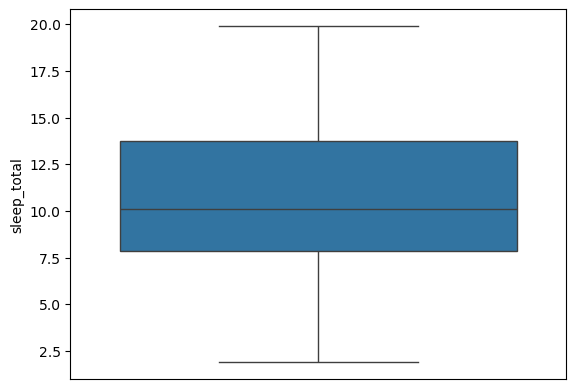

In [116]:
import plotly.express as px
px.box(df_animal.sleep_total)
plt.boxplot(df_animal.sleep_total)
sns.boxplot(df_animal.sleep_total)

In [118]:
import pandas as pd
df_sales = pd.read_csv("data/amir_deals.csv")
df_sales

,Unnamed: 0,product,client,status,amount,num_users
0,1,Product F,Current,Won,7389.52,19
1,2,Product C,New,Won,4493.01,43
2,3,Product B,New,Won,5738.09,87
3,4,Product I,Current,Won,2591.24,83
4,5,Product E,Current,Won,6622.97,17
...,...,...,...,...,...,...
173,174,Product A,Current,Lost,5835.32,23
174,175,Product D,Current,Won,6377.50,12
175,176,Product D,Current,Won,3537.61,28
176,177,Product A,Current,Won,6448.07,34


In [130]:
#df_sales veri setindeki verileri num_users sütunundaki değerlere göre gruplar.
df_sales_users = df_sales.groupby('num_users')['amount'].agg(sum='sum')
#içinden rastgele bir örnek seçer
df_sales_users.sample()
np.random.seed(42)
df_sales_users.sample()

,sum
num_users,
33,7077.48


In [134]:
df_sales_users.sample(n=5, replace=True)

,sum
num_users,
6,13259.50
29,16272.04
29,16272.04
47,6949.71
32,5663.22


In [136]:
#Tabakalı Örnekleme: Popülasyon gruplara ayrılır, her gruptan eşit oranda örnek seçilir.
#Ağırlıklı Örnekleme: Her bir grubun popülasyondaki oranına göre örnekler alınır.
#Küme Örnekleme: Alt gruplara ayrılmış popülasyonda belirli kümeler seçilir.
#Sistematik Örnekleme: Belirli aralıklarla örnekler seçilir, popülasyon sıralıdır.
    
import pandas as pd
df_coffee = pd.read_feather("data/coffee_ratings_full.feather")
df_coffee

,total_cup_points,species,owner,country_of_origin,farm_name,lot_number,mill,ico_number,company,altitude,...,color,category_two_defects,expiration,certification_body,certification_address,certification_contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
0,90.58,Arabica,metad plc,Ethiopia,metad plc,None,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,0.0,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
1,89.92,Arabica,metad plc,Ethiopia,metad plc,None,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,1.0,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
2,89.75,Arabica,grounds for health admin,Guatemala,"san marcos barrancas ""san cristobal cuch",None,None,None,None,1600 - 1800 m,...,None,0.0,"May 31st, 2011",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,1600.0,1800.0,1700.0
3,89.00,Arabica,yidnekachew dabessa,Ethiopia,yidnekachew dabessa coffee plantation,None,wolensu,None,yidnekachew debessa coffee plantation,1800-2200,...,Green,2.0,"March 25th, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1800.0,2200.0,2000.0
4,88.83,Arabica,metad plc,Ethiopia,metad plc,None,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,2.0,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,78.75,Robusta,luis robles,Ecuador,robustasa,Lavado 1,our own lab,None,robustasa,None,...,Blue-Green,1.0,"January 18th, 2017",Specialty Coffee Association,ff7c18ad303d4b603ac3f8cff7e611ffc735e720,352d0cf7f3e9be14dad7df644ad65efc27605ae2,m,NaN,NaN,NaN
1334,78.08,Robusta,luis robles,Ecuador,robustasa,Lavado 3,own laboratory,None,robustasa,40,...,Blue-Green,0.0,"January 18th, 2017",Specialty Coffee Association,ff7c18ad303d4b603ac3f8cff7e611ffc735e720,352d0cf7f3e9be14dad7df644ad65efc27605ae2,m,40.0,40.0,40.0
1335,77.17,Robusta,james moore,United States,fazenda cazengo,None,cafe cazengo,None,global opportunity fund,795 meters,...,None,6.0,"December 23rd, 2015",Specialty Coffee Association,ff7c18ad303d4b603ac3f8cff7e611ffc735e720,352d0cf7f3e9be14dad7df644ad65efc27605ae2,m,795.0,795.0,795.0
1336,75.08,Robusta,cafe politico,India,None,None,None,14-1118-2014-0087,cafe politico,None,...,Green,1.0,"August 25th, 2015",Specialty Coffee Association,ff7c18ad303d4b603ac3f8cff7e611ffc735e720,352d0cf7f3e9be14dad7df644ad65efc27605ae2,m,NaN,NaN,NaN


In [146]:
#sistematik örnekleme
sample_size = 5
pop_size = df_coffee.shape[0]
pop_size
interval = pop_size // sample_size
interval
df_coffee.iloc[interval::interval]

,total_cup_points,species,owner,country_of_origin,farm_name,lot_number,mill,ico_number,company,altitude,...,color,category_two_defects,expiration,certification_body,certification_address,certification_contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
267,83.92,Arabica,federacion nacional de cafeteros,Colombia,None,None,None,01-1969,federacion nacional de cafeteros,None,...,None,1.0,"March 11th, 2016",Almacafé,e493c36c2d076bf273064f7ac23ad562af257a25,70d3c0c26f89e00fdae6fb39ff54f0d2eb1c38ab,m,NaN,NaN,NaN
534,82.92,Arabica,consejo salvadoreño del café,El Salvador,santa josefita,1-198,beneficio cuzcachapa,09-030-273,soc. coop. cuzcachapa de r.l.,1350,...,Green,1.0,"August 28th, 2018",Salvadoran Coffee Council,3d4987e3b91399dbb3938b5bdf53893b6ef45be1,27b21e368fb8291cbea02c60623fe6c98f84524d,m,1350.0,1350.0,1350.0
801,82.00,Arabica,"lin, che-hao krude 林哲豪",Taiwan,"you siang coffee farmtainan, taiwan 台灣台南優香咖啡",None,"you siang coffee farmtainan, taiwan 台灣台南優香咖啡",Taiwan,"red on tree co., ltd.",600m,...,Green,0.0,"July 22nd, 2015",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,600.0,600.0,600.0
1068,80.50,Arabica,cqi taiwan icp cqi台灣合作夥伴,Taiwan,王秋金,1,non,None,王秋金,50,...,Blue-Green,0.0,"December 8th, 2018",Blossom Valley International,fc45352eee499d8470cf94c9827922fb745bf815,de73fc9412358b523d3a641501e542f31d2668b0,m,50.0,50.0,50.0
1335,77.17,Robusta,james moore,United States,fazenda cazengo,None,cafe cazengo,None,global opportunity fund,795 meters,...,None,6.0,"December 23rd, 2015",Specialty Coffee Association,ff7c18ad303d4b603ac3f8cff7e611ffc735e720,352d0cf7f3e9be14dad7df644ad65efc27605ae2,m,795.0,795.0,795.0


<Axes: xlabel='index', ylabel='aftertaste'>

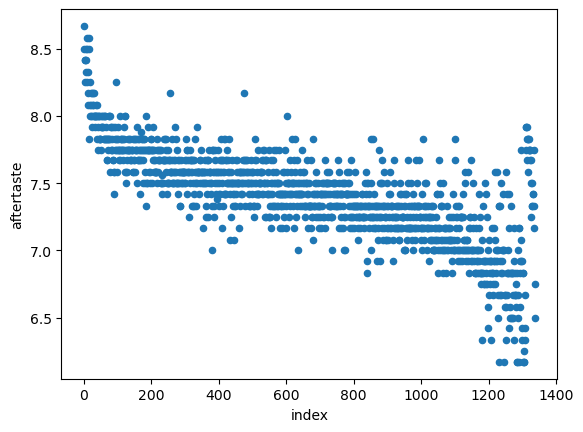

In [158]:
#bizim dfde başta güzel kahveler aşapda kötüler var o yüzden. önce grafik izip örüntü var mı yok mu bakılır
df_coffee_id = df_coffee.reset_index()
df_coffee_id.plot(x='index',y='aftertaste', kind='scatter')

<Axes: xlabel='index', ylabel='aftertaste'>

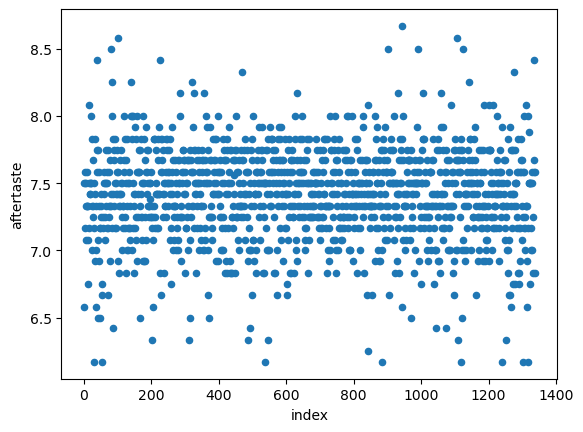

In [164]:
shuffled = df_coffee.sample(frac=1)
shuffled = shuffled.reset_index(drop=True).reset_index()
shuffled.plot(x='index',y='aftertaste', kind='scatter')

In [174]:
top_counts = df_coffee['country_of_origin'].value_counts()
top_counts
# top_counts2= df_coffee['country_of_origin'].value_counts().head(6).toList()
top_counts2 = df_coffee['country_of_origin'].value_counts().head(6).index.tolist()
top_counts2

['Mexico',
 'Colombia',
 'Guatemala',
 'Brazil',
 'Taiwan',
 'United States (Hawaii)']

In [178]:
top_counted = df_coffee['country_of_origin'].isin(top_counts2)
coffee_ratings_top = df_coffee[top_counted]
coffee_ratings_top

,total_cup_points,species,owner,country_of_origin,farm_name,lot_number,mill,ico_number,company,altitude,...,color,category_two_defects,expiration,certification_body,certification_address,certification_contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
2,89.75,Arabica,grounds for health admin,Guatemala,"san marcos barrancas ""san cristobal cuch",None,None,None,None,1600 - 1800 m,...,None,0.0,"May 31st, 2011",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,1600.00,1800.00,1700.00
5,88.83,Arabica,ji-ae ahn,Brazil,None,None,None,None,None,None,...,Bluish-Green,1.0,"September 3rd, 2014",Specialty Coffee Institute of Asia,726e4891cf2c9a4848768bd34b668124d12c4224,b70da261fcc84831e3e9620c30a8701540abc200,m,NaN,NaN,NaN
13,87.92,Arabica,grounds for health admin,United States (Hawaii),arianna farms,None,None,None,None,2000 ft,...,None,2.0,"May 31st, 2011",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,ft,609.60,609.60,609.60
22,87.17,Arabica,roberto licona franco,Mexico,la herradura,None,la herradura,0,None,1320,...,Green,0.0,"July 26th, 2013",AMECAFE,59e396ad6e22a1c22b248f958e1da2bd8af85272,0eb4ee5b3f47b20b049548a2fd1e7d4a2b70d0a7,m,1320.00,1320.00,1320.00
25,86.92,Arabica,nucoffee,Brazil,fazenda kaquend,None,None,002/1251/0073,nucoffee,1250m,...,Green,2.0,"December 2nd, 2012",NUCOFFEE,567f200bcc17a90070cb952647bf88141ad9c80c,aa2ff513ffb9c844462a1fb07c599bce7f3bb53d,m,1250.00,1250.00,1250.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1300,71.00,Arabica,ricardo aaron sampieri marini,Mexico,la morena,None,"tlamatoca, hutusco, ver.",1104351023,None,1800,...,Green,0.0,"July 11th, 2013",AMECAFE,59e396ad6e22a1c22b248f958e1da2bd8af85272,0eb4ee5b3f47b20b049548a2fd1e7d4a2b70d0a7,m,1800.00,1800.00,1800.00
1301,70.75,Arabica,kurt kappeli,Mexico,various,None,f.i.e.c.h.,0016-2847-0001,globus coffee,1000 meters,...,Green,1.0,"May 5th, 2015",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,1000.00,1000.00,1000.00
1302,70.67,Arabica,volcafe ltda. - brasil,Brazil,None,2017/2018 - Lot 2,copag,None,volcafe ltda.,None,...,Green,55.0,"October 27th, 2018",Brazil Specialty Coffee Association,3297cfa4c538e3dd03f72cc4082c54f7999e1f9d,8900f0bf1d0b2bafe6807a73562c7677d57eb980,m,NaN,NaN,NaN
1306,68.33,Arabica,juan carlos garcia lopez,Mexico,el centenario,None,"la esperanza, municipio juchique de ferrer, ve...",1104328663,terra mia,900,...,None,20.0,"September 17th, 2013",AMECAFE,59e396ad6e22a1c22b248f958e1da2bd8af85272,0eb4ee5b3f47b20b049548a2fd1e7d4a2b70d0a7,m,900.00,900.00,900.00


In [184]:
coffee_ratings_samp = coffee_ratings_top.sample(frac=0.1, random_state=2021)
coffee_ratings_samp

,total_cup_points,species,owner,country_of_origin,farm_name,lot_number,mill,ico_number,company,altitude,...,color,category_two_defects,expiration,certification_body,certification_address,certification_contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
1229,78.33,Arabica,pablo cervantes morelos,Mexico,llano hermoso,None,"llano hermoso, xochitonalco huautla, oaxaca",0,asociación agricola local de productores de ca...,1300,...,Green,47.0,"September 11th, 2013",AMECAFE,3e18a5ae6f5e2aabca37e025f94e1974558bf5f0,e3212d17882b7657b3fba559b4072e552604d5d1,m,1300.0,1300.0,1300.0
232,84.08,Arabica,carcafe ltda ci,Colombia,None,3-59-0503,neiva,3-59-0503,carcafe ltda,442,...,Green,3.0,"November 9th, 2018",Almacafé,e493c36c2d076bf273064f7ac23ad562af257a25,70d3c0c26f89e00fdae6fb39ff54f0d2eb1c38ab,m,442.0,442.0,442.0
697,82.42,Arabica,jose daniel cobilt castro,Mexico,cañada fria,None,huatusco,1104558673,None,1350,...,Green,6.0,"July 11th, 2013",AMECAFE,59e396ad6e22a1c22b248f958e1da2bd8af85272,0eb4ee5b3f47b20b049548a2fd1e7d4a2b70d0a7,m,1350.0,1350.0,1350.0
865,81.75,Arabica,diego manuel woolrich ramirez,Mexico,"arroyo triste, arroyo triste, san jose vista h...",None,"arroyo triste, arroyo triste, san jose vista h...","2037240, 2037150,1400213685",None,1100,...,Green,1.0,"September 4th, 2013",AMECAFE,59e396ad6e22a1c22b248f958e1da2bd8af85272,0eb4ee5b3f47b20b049548a2fd1e7d4a2b70d0a7,m,1100.0,1100.0,1100.0
155,84.58,Arabica,exportadora de cafe condor s.a,Colombia,various,None,trilladora boananza,3-68-0005,exportadora de cafe condor s.a,1800 msnm,...,Green,6.0,"October 9th, 2013",Almacafé,e493c36c2d076bf273064f7ac23ad562af257a25,70d3c0c26f89e00fdae6fb39ff54f0d2eb1c38ab,m,1800.0,1800.0,1800.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1282,74.83,Arabica,pablo enrique martinez gama,Mexico,la orduña,None,falcafe s.a. de c.v.,1104362940,None,1250,...,Green,30.0,"August 1st, 2013",AMECAFE,59e396ad6e22a1c22b248f958e1da2bd8af85272,0eb4ee5b3f47b20b049548a2fd1e7d4a2b70d0a7,m,1250.0,1250.0,1250.0
369,83.50,Arabica,gabriel bernardo rivas ross,Mexico,la corralera,None,dos puentes de finca kassandra,2484,None,1400,...,Green,0.0,"July 11th, 2013",AMECAFE,59e396ad6e22a1c22b248f958e1da2bd8af85272,0eb4ee5b3f47b20b049548a2fd1e7d4a2b70d0a7,m,1400.0,1400.0,1400.0
852,81.83,Arabica,jacques pereira carneiro,Brazil,sertao farm,None,armazens gerais cocarive,002/1352/0159,exportadora de cafés carmo de minas ltda,1250,...,Bluish-Green,0.0,"March 2nd, 2014",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,1250.0,1250.0,1250.0
713,82.33,Arabica,bourbon specialty coffees,Brazil,None,None,None,002/4542/0478,bourbon specialty coffees,None,...,Green,10.0,"April 19th, 2016",Brazil Specialty Coffee Association,3297cfa4c538e3dd03f72cc4082c54f7999e1f9d,8900f0bf1d0b2bafe6807a73562c7677d57eb980,m,NaN,NaN,NaN


In [188]:
coffee_ratings_samp['country_of_origin'].value_counts(normalize=True)

country_of_origin
Mexico                    0.250000
Guatemala                 0.204545
Colombia                  0.181818
Brazil                    0.181818
United States (Hawaii)    0.102273
Taiwan                    0.079545
Name: proportion, dtype: float64

In [194]:
#eşit gelsin
coffee_ratings_top.groupby('country_of_origin').sample(n=15, random_state=2021)

,total_cup_points,species,owner,country_of_origin,farm_name,lot_number,mill,ico_number,company,altitude,...,color,category_two_defects,expiration,certification_body,certification_address,certification_contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
42,86.17,Arabica,jacques pereira carneiro,Brazil,pereira estate coffee,None,cocarive,002/1352/0045,None,1.2,...,None,3.0,"January 4th, 2012",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,12.0,12.0,12.0
1020,80.92,Arabica,jacques pereira carneiro,Brazil,sertao farm,None,cafeco 3,002/135-2/0075,exportadora de cafés carmo de minas ltda,1200,...,Green,8.0,"December 16th, 2015",Brazil Specialty Coffee Association,3297cfa4c538e3dd03f72cc4082c54f7999e1f9d,8900f0bf1d0b2bafe6807a73562c7677d57eb980,m,1200.0,1200.0,1200.0
32,86.42,Arabica,nucoffee,Brazil,fazenda recreio,None,None,002/1251/0068,nucoffee,1300,...,Green,2.0,"December 2nd, 2012",NUCOFFEE,567f200bcc17a90070cb952647bf88141ad9c80c,aa2ff513ffb9c844462a1fb07c599bce7f3bb53d,m,1300.0,1300.0,1300.0
384,83.42,Arabica,bourbon specialty coffees,Brazil,cachoeira da grama farm,None,None,002/4542/0886,bourbon specialty coffees,None,...,Green,6.0,"January 15th, 2016",Brazil Specialty Coffee Association,3297cfa4c538e3dd03f72cc4082c54f7999e1f9d,8900f0bf1d0b2bafe6807a73562c7677d57eb980,m,NaN,NaN,NaN
730,82.33,Arabica,nucoffee,Brazil,sitío santa luzia,None,None,002/1251/0243,nucoffee,1100m,...,Green,2.0,"April 11th, 2013",NUCOFFEE,567f200bcc17a90070cb952647bf88141ad9c80c,aa2ff513ffb9c844462a1fb07c599bce7f3bb53d,m,1100.0,1100.0,1100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
985,81.17,Arabica,kona pacific farmers cooperative,United States (Hawaii),None,None,None,None,None,None,...,None,0.0,"September 21st, 2012",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,ft,NaN,NaN,NaN
411,83.33,Arabica,kona pacific farmers cooperative,United States (Hawaii),None,None,None,2234503 KONA PRIME,kona pacific farmers cooperative,None,...,Bluish-Green,4.0,"January 24th, 2014",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,ft,NaN,NaN,NaN
488,83.08,Arabica,kona pacific farmers cooperative,United States (Hawaii),None,None,None,K131353,kona pacific farmers cooperative,None,...,Bluish-Green,0.0,"March 8th, 2014",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,ft,NaN,NaN,NaN
1296,72.58,Arabica,eileen koyanagi,United States (Hawaii),None,None,None,KP 022014,kona pacific farmers cooperative,None,...,Green,9.0,"March 10th, 2015",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,ft,NaN,NaN,NaN


In [198]:
coffee_ratings_weight = coffee_ratings_top.copy()
condition = coffee_ratings_weight['country_of_origin'] == 'Taiwan'
coffee_ratings_weight['weight'] = np.where(condition, 2, 1)
coffee_ratings_weight = coffee_ratings_weight.sample(frac=0.1, weights='weight')
coffee_ratings_weight['country_of_origin'].value_counts(normalize=True)

country_of_origin
Guatemala                 0.227273
Mexico                    0.227273
Taiwan                    0.170455
Colombia                  0.159091
Brazil                    0.136364
United States (Hawaii)    0.079545
Name: proportion, dtype: float64

In [204]:
#df_coffee veri çerçevesinden %5 oranında rastgele bir örneklem almak için hangi kodu yazarsınız?
df_sample = df_coffee.sample(frac=0.05)
df_sample

,total_cup_points,species,owner,country_of_origin,farm_name,lot_number,mill,ico_number,company,altitude,...,color,category_two_defects,expiration,certification_body,certification_address,certification_contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
856,81.83,Arabica,nucoffee,Brazil,cianorte,None,None,002/1251/0361,None,900-950m,...,None,2.0,"October 27th, 2012",NUCOFFEE,567f200bcc17a90070cb952647bf88141ad9c80c,aa2ff513ffb9c844462a1fb07c599bce7f3bb53d,m,900.0000,950.0000,925.0000
987,81.08,Arabica,gregorio sebba,Brazil,fazenda são josé mirante,14,garca armazens,None,garca armazens,695,...,Green,8.0,"June 21st, 2018",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,695.0000,695.0000,695.0000
952,81.33,Arabica,angel oscar medina rodriguez,Mexico,None,1,ac la laja sa de cv,None,ac la laja sa de cv,1130,...,Green,0.0,"February 24th, 2017",Centro Agroecológico del Café A.C.,3b8dfdd621590b424ff64e0b76df7d6a92e1c628,d470dc009281519e30da6ead1c649fcd7670f386,m,1130.0000,1130.0000,1130.0000
1240,78.00,Arabica,juan luis alvarado romero,Guatemala,la union monte verde,None,beneficio ixchel,11/9772/3,"unex guatemala, s.a.",4300,...,Green,9.0,"April 29th, 2014",Asociacion Nacional Del Café,b1f20fe3a819fd6b2ee0eb8fdc3da256604f1e53,724f04ad10ed31dbb9d260f0dfd221ba48be8a95,ft,1310.6400,1310.6400,1310.6400
650,82.58,Arabica,organizaciones de productores de cafe colimense,Mexico,la timbuchera; el ocotito y la hortaliza,None,beneficio cafetaleros del arrayanal,703815218; 703815215; 703815197,organizaciones de productores de cafe colimens...,1150,...,Green,0.0,"July 2nd, 2013",AMECAFE,59e396ad6e22a1c22b248f958e1da2bd8af85272,0eb4ee5b3f47b20b049548a2fd1e7d4a2b70d0a7,m,1150.0000,1150.0000,1150.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336,83.58,Arabica,juan luis alvarado romero,Guatemala,finca santa clara,11/52/1170,beneficio exportacafe agua santa,11/52/1170,exportcafe,3702,...,Green,0.0,"July 5th, 2017",Asociacion Nacional Del Café,b1f20fe3a819fd6b2ee0eb8fdc3da256604f1e53,724f04ad10ed31dbb9d260f0dfd221ba48be8a95,ft,1128.3696,1128.3696,1128.3696
1297,72.33,Arabica,myriam kaplan-pasternak,Haiti,2000 farmers,None,cooperative agro-industrielle de marmela,None,None,640m-1400m,...,None,0.0,"August 22nd, 2012",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,640.0000,1400.0000,1020.0000
460,83.17,Arabica,juan luis alvarado romero,Guatemala,nueva granada,None,beneficio nueva granada,11-326-10,"agricola nueva granada, s.a.",5000 pies,...,Green,1.0,"March 27th, 2015",Asociacion Nacional Del Café,b1f20fe3a819fd6b2ee0eb8fdc3da256604f1e53,724f04ad10ed31dbb9d260f0dfd221ba48be8a95,ft,1524.0000,1524.0000,1524.0000
1183,79.25,Arabica,marco virgilio ramirez teliz,Mexico,el aguacate,None,cafes de naranjal s.a. de c.v.,1104367469,cafes de naranjal s.a. de c.v,1000,...,Green,10.0,"September 10th, 2013",AMECAFE,59e396ad6e22a1c22b248f958e1da2bd8af85272,0eb4ee5b3f47b20b049548a2fd1e7d4a2b70d0a7,m,1000.0000,1000.0000,1000.0000


In [206]:
df_coffee.sample(frac=0.1)

,total_cup_points,species,owner,country_of_origin,farm_name,lot_number,mill,ico_number,company,altitude,...,color,category_two_defects,expiration,certification_body,certification_address,certification_contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
1057,80.67,Arabica,juan luis alvarado romero,Guatemala,chiquimulja / alpha cafe / senfro,None,None,11/23/0233,"unex guatemala, s.a.",None,...,Green,2.0,"January 24th, 2013",Asociacion Nacional Del Café,b1f20fe3a819fd6b2ee0eb8fdc3da256604f1e53,724f04ad10ed31dbb9d260f0dfd221ba48be8a95,m,NaN,NaN,NaN
1140,79.83,Arabica,juan luis alvarado romero,Guatemala,piamonte,11/23/0639,beneficio ixchel,11/23/0639,"unex guatemala, s.a.",1700,...,Green,2.0,"August 22nd, 2018",Asociacion Nacional Del Café,b1f20fe3a819fd6b2ee0eb8fdc3da256604f1e53,724f04ad10ed31dbb9d260f0dfd221ba48be8a95,m,1700.00,1700.00,1700.00
651,82.58,Arabica,racafe & cia s.c.a,Colombia,None,None,None,3-37-1435,c.i.racafe & cia s.c.a,de 1.600 a 1.950 msnm,...,Green,2.0,"June 13th, 2013",Almacafé,e493c36c2d076bf273064f7ac23ad562af257a25,70d3c0c26f89e00fdae6fb39ff54f0d2eb1c38ab,m,1600.00,1950.00,1775.00
190,84.33,Arabica,the coffee source inc.,Guatemala,las minas,None,las minas,11-897-10,None,4400-4700 ft,...,None,1.0,"April 30th, 2011",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,ft,1341.12,1432.56,1386.84
123,84.75,Arabica,the coffee source inc.,El Salvador,several,None,la majada cooperative,9-29-1986,None,1200 mts,...,None,3.0,"August 22nd, 2012",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,1200.00,1200.00,1200.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
622,82.67,Arabica,exportadora de cafe condor s.a,Colombia,None,None,trilladora boananza,3-68-0049,exportadora de cafe condor s.a,1800 msnm,...,Bluish-Green,3.0,"January 22nd, 2014",Almacafé,e493c36c2d076bf273064f7ac23ad562af257a25,70d3c0c26f89e00fdae6fb39ff54f0d2eb1c38ab,m,1800.00,1800.00,1800.00
294,83.83,Arabica,ethiopia commodity exchange,Ethiopia,"phone number | 0911-51-08-01, email | at",None,None,010/0170,None,None,...,None,3.0,"June 17th, 2011",Ethiopia Commodity Exchange,a176532400aebdc345cf3d870f84ed3ecab6249e,61bbaf6a9f341e5782b8e7bd3ebf76aac89fe24b,m,NaN,NaN,NaN
1129,80.00,Arabica,ethiopia commodity exchange,Ethiopia,"phone number | 0911-51-08-01, email | at",None,None,010/0170,None,None,...,None,2.0,"June 17th, 2011",Ethiopia Commodity Exchange,a176532400aebdc345cf3d870f84ed3ecab6249e,61bbaf6a9f341e5782b8e7bd3ebf76aac89fe24b,m,NaN,NaN,NaN
701,82.42,Arabica,carcafe ltda ci,Colombia,None,None,None,3-59-0782,carcafe ltda,442 msnm,...,None,2.0,"January 30th, 2013",Almacafé,e493c36c2d076bf273064f7ac23ad562af257a25,70d3c0c26f89e00fdae6fb39ff54f0d2eb1c38ab,m,442.00,442.00,442.00


In [214]:
#df_coffee veri çerçevesinde country_of_origin sütununa göre her ülkeden %10 oranında veri seçmek:
df_coffee.groupby('country_of_origin').sample(frac=0.1)
df_sample = df_coffee.groupby('country_of_origin', group_keys=False).apply(lambda x: x.sample(frac=0.1))


/var/folders/zf/gnk755n14rj48wl97n0lv_0w0000gn/T/ipykernel_13010/2800974696.py:3: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.

